# 1.. Lets Read data & perform basic basic analysis !

In [2]:
library(dplyr)
library(ggplot2)
library(plotly)

In [3]:
args(read.csv)

function (file, header = TRUE, sep = ",", quote = "\"", dec = ".", 
    fill = TRUE, comment.char = "", ...) 
NULL

In [ ]:
help(read.csv)

### Reads a file in table format and creates a data frame from it

In [ ]:
"

Parameters:

file : The path to the CSV file to be read.
header : A logical value indicating whether the file contains the names of the variables as the first line (header). 
         Default is TRUE.
sep : The separator character used in the CSV file. Default is ","
quote : The character used to enclose fields that contain special characters, such as commas or line breaks. 
        Default is "\""
dec : The character used in the file for decimal points. Default is "." ..
fill : A logical value indicating whether to fill missing fields with NA. Default is TRUE.
comment.char : The character used to indicate comments in the file. Default is an empty string.
... : Additional arguments to be passed to read.table().



"

In [4]:
# Assuming the file path is 'Z:\\Data_Analysis_Projects\\Bitcoin/bitcoin_price_Training - Training.csv'
## file_path = 'Z:\\Data_Analysis_Projects\\Bitcoin/bitcoin_price_Training - Training.csv' # OLD PC

file_path = "R:/All_Datasets/Data_Analysis_Projects/Bitcoin/
            bitcoin_price_Training - Training.csv"

df = read.csv(file_path)

## while mentioning file path , mention either '/' or '\\' or '//'
## Note : '\'(single backward slash) will not work .. 
## ie R uses forward slash instead of single backward slash in filename

In [5]:
head(df , 3)

,Date,Open,High,Low,Close,Volume,Market.Cap
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
3,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [6]:
## help(names)

## names() is used to get or set the names of the elements in an 
## object(vector, matrix , list or data frame)

In [7]:
names(df)

[1] "Date"       "Open"       "High"       "Low"        "Close"     
[6] "Volume"     "Market.Cap"

In [ ]:
## help(dim)
## dim() in R is used to retrieve or set the dimensions of an array-like object 
## such as matrices, arrays or data frames

In [8]:
dim(df)

[1] 1556    7

In [7]:
help(summary)

## Object Summaries

In [9]:
args(summary)

function (object, ...) 
NULL

In [10]:
summary(df)

     Date                Open             High              Low         
 Length:1556        Min.   :  68.5   Min.   :  74.56   Min.   :  65.53  
 Class :character   1st Qu.: 254.3   1st Qu.: 260.33   1st Qu.: 248.84  
 Mode  :character   Median : 438.6   Median : 447.56   Median : 430.57  
                    Mean   : 582.6   Mean   : 597.99   Mean   : 567.85  
                    3rd Qu.: 662.4   3rd Qu.: 674.52   3rd Qu.: 646.74  
                    Max.   :2953.2   Max.   :2999.91   Max.   :2840.53  
     Close            Volume           Market.Cap       
 Min.   :  68.43   Length:1556        Length:1556       
 1st Qu.: 254.32   Class :character   Class :character  
 Median : 438.86   Mode  :character   Mode  :character  
 Mean   : 584.24                                        
 3rd Qu.: 663.40                                        
 Max.   :2958.11                                        

# 2.. Doing Data Pre-processing !
        Check whether data-types are correct or not 
        check whether Data have missing value or not 
        check whether data have duplicate entries or not !

In [ ]:
help(lapply)

## lapply returns a list 

## lapply( x , fun )
## X : a vector (atomic or list) 
## FUN : the function to be applied to each element of 

In [11]:
args(lapply)

function (X, FUN, ...) 
NULL

In [ ]:
"

X : This is the list (or vector) , dataframe on which u want to apply 
    function FUN ..

FUN : This is the function to be applied to each element of the list X..

... : These are additional arguments that can be passed to the lapply as per need..


"

In [12]:
lapply(df, class)

$Date
[1] "character"

$Open
[1] "numeric"

$High
[1] "numeric"

$Low
[1] "numeric"

$Close
[1] "numeric"

$Volume
[1] "character"

$Market.Cap
[1] "character"

In [ ]:
"

So, when you run lapply(df, class) , 
it takes each column of the 'df' dataframe & applies the class() function to it, 

and returns a Output as list where each element/col tells class (data type) 
of a column in the 'df' dataframe.


"

In [ ]:
   
### it says that "date" has character(string) values , 
### but it should have date-time values , ie in context of R ,
### it should have 'POSIXlt' or 'POSIXt' data-types

In [ ]:
"

In R,  there are several data types that can be used to represent dates...
R's base package provides some basic date and time classes and functions, 
such as Date, POSIXct, POSIXlt
)..and functions like Sys.Date(), Sys.time(), and as.Date()

1) Date: base-R
The Date data type in R is used to represent dates without a time component. 
It's suitable for applications where you only need to work with dates, 
such as tracking events or appointments.



2) 'POSIXlt' and 'POSIXt' of base-R
Portable Operating System Interface (POSIX) Time, List format.
These are data types that which are used to represent date and time values. 
These data types are part of the base R system and are commonly used 
for handling date and time-related operations


a) 'POSIXlt' (List-Based Date-Time):
'POSIXlt' : Portable Operating System Interface (POSIX) Time, List format.
ie , 'POSIXlt' stands for "List-Based Date-Time"

It represents date and time values as a list of components, 
including year, month, day, hour, minute, second, etc..

Each component is stored as a separate element in the list.
'POSIXlt' objects are more flexible and provide access to individual date and time components, 
making them suitable for various date and time calculations.
They are less memory-efficient compared to 'POSIXct' because of the storage of individual components..




b) 'POSIXct' (Calendar-Based Date-Time):

POSIXct() : "Portable Operating System Interface (POSIX) , compliant date and time
POSIXct is a data type in R that represents date and time with fractional seconds..

in short , 'POSIXct' stands for "Calendar-Based Date-Time."
It represents date and time values as a numeric value, 
which is the number of seconds since the Unix epoch (January 1, 1970, at 00:00:00 UTC)..
'POSIXct' objects are more memory-efficient because 
they store date and time values as a single numeric value.
They are less flexible for accessing individual components directly, 
but they are faster for certain operations that involve arithmetic with date and time values.



"

In [ ]:
## In uber case-study , we have used as.POSIXct() to convert into 
## date-time objects in 2nd & 8th tutorial !

In [ ]:
## Lets use as.Date() to convert into date objects 
## bcz here we do not  have time component & as.Date() doesn't consider time
## component as well !

In [13]:
as.Date("Jul 31, 2017")

ERROR: Error in charToDate(x): character string is not in a standard unambiguous format


In [ ]:
"

The error message indicates that the character string is not in a 
standard unambiguous format that can be directly converted to a date..


"Jul 31, 2017" is not in the default format.. 
To resolve this issue, you can specify the format using the format parameter.. 
In your case, the correct format would be "%b %d, %Y", where :

%b: Abbreviated month name (e.g., "Jul").
%d: Day of the month in numeric(01, 02, ..., 31).
%Y: Four-digit year 

"

In [14]:
as.Date("Jul 31, 2017", format = "%b %d, %Y")

[1] "2017-07-31"

In [15]:
df$Date[1:5]

[1] "Jul 31, 2017" "Jul 30, 2017" "Jul 29, 2017" "Jul 28, 2017" "Jul 27, 2017"

In [16]:
class(df$Date[1:5])

[1] "character"

In [17]:
as.Date(df$Date[1:5] , format = "%b %d, %Y")

[1] "2017-07-31" "2017-07-30" "2017-07-29" "2017-07-28" "2017-07-27"

In [18]:
as.POSIXct(df$Date[1:5])

ERROR: Error in as.POSIXlt.character(x, tz, ...): character string is not in a standard unambiguous format


In [19]:
as.POSIXct(df$Date[1:5], format = "%Y-%m-%d")

[1] NA NA NA NA NA

In [20]:
df$Date[1]

### ie format is Month name day , year

[1] "Jul 31, 2017"

In [21]:
as.POSIXct(df$Date[1:5], format = "%b %d, %Y")

[1] "2017-07-31 IST" "2017-07-30 IST" "2017-07-29 IST" "2017-07-28 IST"
[5] "2017-07-27 IST"

In [ ]:
"

Explanation of the format : 

%b: Abbreviated month name (e.g., "Jul").
%d: Day of the month as decimal number (01, 02, ..., 31).
%Y: Year with century as a decimal number.


"

In [22]:
class(as.POSIXct(df$Date[1:5], format = "%b %d, %Y"))

[1] "POSIXct" "POSIXt"

In [ ]:
"
as.POSIXct(df$Date[1:5], format = "%Y-%m-%d %H:%M:%S")

## returns NA value..

"

In [23]:
df$Date = as.Date(df$Date , format = "%b %d, %Y")

In [24]:
min(df$Date)

[1] "2013-04-28"

In [25]:
max(df$Date)

[1] "2017-07-31"

In [ ]:
'''

ie data is collected from "28th April 2013" to "31st July 2017"

'''

    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a class , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether each element in a vector or data frame is missing or not.

In [ ]:
help(is.na)

## The generic function is.na indicates which elements are missing in vectors and data frames in R

## is.na(x)
## anyNA(x, recursive = FALSE)

In [ ]:
is.na(df) ## returns logical dataframe ie (True/False)

In [26]:
colSums(is.na(df)) ## return missing values in every col..

Date       Open       High        Low      Close     Volume Market.Cap 
         0          0          0          0          0          0          0

In [2]:
args(duplicated)

function (x, incomparables = FALSE, ...) 
NULL

In [ ]:
help(duplicated)

In [ ]:
"

duplicated(x, incomparables = FALSE, ...)

## Default S3 method:
duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

## S3 method for class 'array'
duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)






1.. duplicated(x, incomparables = FALSE, ...)
    duplicated() in R is used to identify duplicate elements in a vector, data frame or array

    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique and not compared for duplication..
                            OR
                    A vector of values that should not be considered when determining duplicates.
                    Default is FALSE..




2.. Default S3 method:
    duplicated(x, incomparables = FALSE,
           fromLast = FALSE, nmax = NA, ...)

    This is the default method of the duplicated function, suitable for most objects 
    like vectors, data frames, etc.
    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.


    x : The vector, array, or data frame to check for duplicates..

    incomparables : A vector of values that should be considered as unique 
                    and not compared for duplication..
                            OR
                    A vector specifying values that should not be considered 
                    when determining duplicates.
                    Default is FALSE..

    fromLast : A logical value indicating whether to identify duplicates from the last occurrence. 
               Default is FALSE..

    nmax : An integer specifying the maximum number of duplicates to return. 
           Default is NA, meaning all duplicates are returned..




3.. S3 method for class 'array':
    duplicated(x, incomparables = FALSE, MARGIN = 1,
           fromLast = FALSE, ...)

    This method is specifically for arrays.
    It identifies duplicates along a specific margin (dimension) of the array.


    MARGIN: An integer indicating which margin to check for duplicates. 
            Default is 1 (rows).
            columns (if MARGIN = 2)


"

In [ ]:
### since u are working dataframes , hence u can use 1st & 2nd one , as 3rd one is for "array"..

In [27]:
sum(duplicated(df))

[1] 0

#### Now sort the dataset from oldest - recent

In [28]:
head(df , 3)

,Date,Open,High,Low,Close,Volume,Market.Cap
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
3,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [29]:
tail(df , 5)

,Date,Open,High,Low,Close,Volume,Market.Cap
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1552,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1553,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1554,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1555,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1556,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [30]:
rownames(df)

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
  [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "20"  
  [21] "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"   "30"  
  [31] "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"   "40"  
  [41] "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"   "50"  
  [51] "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"   "60"  
  [61] "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "70"  
  [71] "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "79"   "80"  
  [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
  [91] "91"   "92"   "93"   "94"   "95"   "96"   "97"   "98"   "99"   "100" 
 [101] "101"  "102"  "103"  "104"  "105"  "106"  "107"  "108"  "109"  "110" 
 [111] "111"  "112"  "113"  "114"  "115"  "116"  "117"  "118"  "119"  "120" 
 [121] "121"  "122"  "123"  "124"  "125"  "126"  "127"  "128"  "129"  "130" 
 [131] "131"  "132"  "133"  "134"  "135"  "136"  "137"  "138"  "139"  "140" 
 [141] "141"  "142"  "143"  "144"  "145"  "146"  "147"  "148"  "149"  "150" 
 [151] "151"  "152"  "153"  "154"  "155"  "156"  "157"  "158"  "159"  "160" 
 [161] "161"  "162"  "163"  "164"  "165"  "166"  "167"  "168"  "169"  "170" 
 [171] "171"  "172"  "173"  "174"  "175"  "176"  "177"  "178"  "179"  "180" 
 [181] "181"  "182"  "183"  "184"  "185"  "186"  "187"  "188"  "189"  "190" 
 [191] "191"  "192"  "193"  "194"  "195"  "196"  "197"  "198"  "199"  "200" 
 [201] "201"  "202"  "203"  "204"  "205"  "206"  "207"  "208"  "209"  "210" 
 [211] "211"  "212"  "213"  "214"  "215"  "216"  "217"  "218"  "219"  "220" 
 [221] "221"  "222"  "223"  "224"  "225"  "226"  "227"  "228"  "229"  "230" 
 [231] "231"  "232"  "233"  "234"  "235"  "236"  "237"  "238"  "239"  "240" 
 [241] "241"  "242"  "243"  "244"  "245"  "246"  "247"  "248"  "249"  "250" 
 [251] "251"  "252"  "253"  "254"  "255"  "256"  "257"  "258"  "259"  "260" 
 [261] "261"  "262"  "263"  "264"  "265"  "266"  "267"  "268"  "269"  "270" 
 [271] "271"  "272"  "273"  "274"  "275"  "276"  "277"  "278"  "279"  "280" 
 [281] "281"  "282"  "283"  "284"  "285"  "286"  "287"  "288"  "289"  "290" 
 [291] "291"  "292"  "293"  "294"  "295"  "296"  "297"  "298"  "299"  "300" 
 [301] "301"  "302"  "303"  "304"  "305"  "306"  "307"  "308"  "309"  "310" 
 [311] "311"  "312"  "313"  "314"  "315"  "316"  "317"  "318"  "319"  "320" 
 [321] "321"  "322"  "323"  "324"  "325"  "326"  "327"  "328"  "329"  "330" 
 [331] "331"  "332"  "333"  "334"  "335"  "336"  "337"  "338"  "339"  "340" 
 [341] "341"  "342"  "343"  "344"  "345"  "346"  "347"  "348"  "349"  "350" 
 [351] "351"  "352"  "353"  "354"  "355"  "356"  "357"  "358"  "359"  "360" 
 [361] "361"  "362"  "363"  "364"  "365"  "366"  "367"  "368"  "369"  "370" 
 [371] "371"  "372"  "373"  "374"  "375"  "376"  "377"  "378"  "379"  "380" 
 [381] "381"  "382"  "383"  "384"  "385"  "386"  "387"  "388"  "389"  "390" 
 [391] "391"  "392"  "393"  "394"  "395"  "396"  "397"  "398"  "399"  "400" 
 [401] "401"  "402"  "403"  "404"  "405"  "406"  "407"  "408"  "409"  "410" 
 [411] "411"  "412"  "413"  "414"  "415"  "416"  "417"  "418"  "419"  "420" 
 [421] "421"  "422"  "423"  "424"  "425"  "426"  "427"  "428"  "429"  "430" 
 [431] "431"  "432"  "433"  "434"  "435"  "436"  "437"  "438"  "439"  "440" 
 [441] "441"  "442"  "443"  "444"  "445"  "446"  "447"  "448"  "449"  "450" 
 [451] "451"  "452"  "453"  "454"  "455"  "456"  "457"  "458"  "459"  "460" 
 [461] "461"  "462"  "463"  "464"  "465"  "466"  "467"  "468"  "469"  "470" 
 [471] "471"  "472"  "473"  "474"  "475"  "476"  "477"  "478"  "479"  "480" 
 [481] "481"  "482"  "483"  "484"  "485"  "486"  "487"  "488"  "489"  "490" 
 [491] "491"  "492"  "493"  "494"  "495"  "496"  "497"  "498"  "499"  "500" 
 [501] "501"  "502"  "503"  "504"  "505"  "506"  "507"  "508"  "509"  "510" 
 [511] "511"  "512"  "513"  "514"  "515"  "516"  "517"  "518"  "519"  "520" 

In [5]:
help(order)

In [ ]:
"

... : a sequence of numeric, complex, character or logical vectors

decreasing :  logical value , ie FALSE/TRUE , ie it Should the sort order be 
                increasing or decreasing


"

In [31]:
args(order)

function (..., na.last = TRUE, decreasing = FALSE, method = c("auto", 
    "shell", "radix")) 
NULL

In [ ]:
## order(rownames(df), decreasing = TRUE)
## returns improper results !

In [32]:
order(as.numeric(rownames(df)), decreasing = TRUE)

[1] 1556 1555 1554 1553 1552 1551 1550 1549 1548 1547 1546 1545 1544 1543
  [15] 1542 1541 1540 1539 1538 1537 1536 1535 1534 1533 1532 1531 1530 1529
  [29] 1528 1527 1526 1525 1524 1523 1522 1521 1520 1519 1518 1517 1516 1515
  [43] 1514 1513 1512 1511 1510 1509 1508 1507 1506 1505 1504 1503 1502 1501
  [57] 1500 1499 1498 1497 1496 1495 1494 1493 1492 1491 1490 1489 1488 1487
  [71] 1486 1485 1484 1483 1482 1481 1480 1479 1478 1477 1476 1475 1474 1473
  [85] 1472 1471 1470 1469 1468 1467 1466 1465 1464 1463 1462 1461 1460 1459
  [99] 1458 1457 1456 1455 1454 1453 1452 1451 1450 1449 1448 1447 1446 1445
 [113] 1444 1443 1442 1441 1440 1439 1438 1437 1436 1435 1434 1433 1432 1431
 [127] 1430 1429 1428 1427 1426 1425 1424 1423 1422 1421 1420 1419 1418 1417
 [141] 1416 1415 1414 1413 1412 1411 1410 1409 1408 1407 1406 1405 1404 1403
 [155] 1402 1401 1400 1399 1398 1397 1396 1395 1394 1393 1392 1391 1390 1389
 [169] 1388 1387 1386 1385 1384 1383 1382 1381 1380 1379 1378 1377 1376 1375
 [183] 1374 1373 1372 1371 1370 1369 1368 1367 1366 1365 1364 1363 1362 1361
 [197] 1360 1359 1358 1357 1356 1355 1354 1353 1352 1351 1350 1349 1348 1347
 [211] 1346 1345 1344 1343 1342 1341 1340 1339 1338 1337 1336 1335 1334 1333
 [225] 1332 1331 1330 1329 1328 1327 1326 1325 1324 1323 1322 1321 1320 1319
 [239] 1318 1317 1316 1315 1314 1313 1312 1311 1310 1309 1308 1307 1306 1305
 [253] 1304 1303 1302 1301 1300 1299 1298 1297 1296 1295 1294 1293 1292 1291
 [267] 1290 1289 1288 1287 1286 1285 1284 1283 1282 1281 1280 1279 1278 1277
 [281] 1276 1275 1274 1273 1272 1271 1270 1269 1268 1267 1266 1265 1264 1263
 [295] 1262 1261 1260 1259 1258 1257 1256 1255 1254 1253 1252 1251 1250 1249
 [309] 1248 1247 1246 1245 1244 1243 1242 1241 1240 1239 1238 1237 1236 1235
 [323] 1234 1233 1232 1231 1230 1229 1228 1227 1226 1225 1224 1223 1222 1221
 [337] 1220 1219 1218 1217 1216 1215 1214 1213 1212 1211 1210 1209 1208 1207
 [351] 1206 1205 1204 1203 1202 1201 1200 1199 1198 1197 1196 1195 1194 1193
 [365] 1192 1191 1190 1189 1188 1187 1186 1185 1184 1183 1182 1181 1180 1179
 [379] 1178 1177 1176 1175 1174 1173 1172 1171 1170 1169 1168 1167 1166 1165
 [393] 1164 1163 1162 1161 1160 1159 1158 1157 1156 1155 1154 1153 1152 1151
 [407] 1150 1149 1148 1147 1146 1145 1144 1143 1142 1141 1140 1139 1138 1137
 [421] 1136 1135 1134 1133 1132 1131 1130 1129 1128 1127 1126 1125 1124 1123
 [435] 1122 1121 1120 1119 1118 1117 1116 1115 1114 1113 1112 1111 1110 1109
 [449] 1108 1107 1106 1105 1104 1103 1102 1101 1100 1099 1098 1097 1096 1095
 [463] 1094 1093 1092 1091 1090 1089 1088 1087 1086 1085 1084 1083 1082 1081
 [477] 1080 1079 1078 1077 1076 1075 1074 1073 1072 1071 1070 1069 1068 1067
 [491] 1066 1065 1064 1063 1062 1061 1060 1059 1058 1057 1056 1055 1054 1053
 [505] 1052 1051 1050 1049 1048 1047 1046 1045 1044 1043 1042 1041 1040 1039
 [519] 1038 1037 1036 1035 1034 1033 1032 1031 1030 1029 1028 1027 1026 1025
 [533] 1024 1023 1022 1021 1020 1019 1018 1017 1016 1015 1014 1013 1012 1011
 [547] 1010 1009 1008 1007 1006 1005 1004 1003 1002 1001 1000  999  998  997
 [561]  996  995  994  993  992  991  990  989  988  987  986  985  984  983
 [575]  982  981  980  979  978  977  976  975  974  973  972  971  970  969
 [589]  968  967  966  965  964  963  962  961  960  959  958  957  956  955
 [603]  954  953  952  951  950  949  948  947  946  945  944  943  942  941
 [617]  940  939  938  937  936  935  934  933  932  931  930  929  928  927
 [631]  926  925  924  923  922  921  920  919  918  917  916  915  914  913
 [645]  912  911  910  909  908  907  906  905  904  903  902  901  900  899
 [659]  898  897  896  895  894  893  892  891  890  889  888  887  886  885
 [673]  884  883  882  881  880  879  878  877  876  875  874  873  872  871
 [687]  870  869  868  867  866  865  864  863  862  861  860  859  858  857
 [701]  856  855  854  853  852  851  850  849  848  847  846  845  844  843
 [715]  842  841  840  839  838  837  836  835  834  833  832  831  830  829

In [33]:
df[order(as.numeric(rownames(df)), decreasing = TRUE), ] ## data[rows , cols ]

,Date,Open,High,Low,Close,Volume,Market.Cap
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1556,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1555,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1554,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1553,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1552,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1551,2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
1550,2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
1549,2013-05-05,112.90,118.80,107.14,115.91,-,"1,254,760,000"
1548,2013-05-06,115.98,124.66,106.64,112.30,-,"1,289,470,000"


In [34]:
temp_df = df[order(as.numeric(rownames(df)), decreasing = TRUE), ]

# 3.. Analysing change in price of the stock overtime?

In [21]:
head(temp_df , 2)

,Date,Open,High,Low,Close,Volume,Market.Cap
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1556,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
1555,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [ ]:
## I want indexes as 1 , 2 , 3 ---
## so very first let me assign feature as "index" having values as 
## 1556 , 1555 , 1554 etc-- & then we will drop this feature..

## Then we will automatically end up getting values as : 1 ,2  3 ----- 

In [6]:
library(tibble)

In [8]:
help(rownames_to_column)

In [7]:
args(rownames_to_column)

## help(rownames_to_column)

function (.data, var = "rowname") 
NULL

    .data : This is the data frame for which you want to convert row names to a column..
    var : This is the name of the new column that will store the row names. The default is "rowname".

In [22]:
temp_df = tibble :: rownames_to_column(temp_df, var = "index")

In [27]:
head(temp_df , 2)

,index,Date,Open,High,Low,Close,Volume,Market.Cap
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1556,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
2,1555,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [10]:
help(subset)

In [ ]:
"

subset(x, ...)

## Default S3 method:
subset(x, subset, ...)

    This is the default method of the subset function, suitable for 
    most objects like vectors, data frames, etc..

    In simple terms in R, S3 stands for "Simple, Structured, and Sensible." 
    It's a basic system for object-oriented programming
                OR
    In R, S3 methods are a way to implement object-oriented programming.



## S3 method for class 'matrix'
subset(x, subset, select, drop = FALSE, ...)

## S3 method for class 'data.frame'
subset(x, subset, select, drop = FALSE, ...)

"




## S3 method for class 'data.frame'
subset(x, subset, select, drop = FALSE, ...)

"
x : object to be subsetted.

select : expression, indicating columns to select from a data frame..

"

In [9]:
args(subset)

function (x, ...) 
NULL

In [32]:
data = subset(temp_df, select = -index)

In [33]:
head(data , 2)

,Date,Open,High,Low,Close,Volume,Market.Cap
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
2,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [34]:
names(data)

[1] "Date"       "Open"       "High"       "Low"        "Close"     
[6] "Volume"     "Market.Cap"

In [ ]:
help(plot)

In [ ]:
"

## Default S3 method :
plot(x, y = NULL, type = "p",  xlim = NULL, ylim = NULL,
     log = "", main = NULL, sub = NULL, xlab = NULL, ylab = NULL,
     ann = par("ann"), axes = TRUE, frame.plot = axes,
     panel.first = NULL, panel.last = NULL, asp = NA,
     xgap.axis = NA, ygap.axis = NA,
     ...)

"

In [1]:
args(plot)

function (x, y, ...) 
NULL



    x: The x-axis values.. (should be a numerical vector)
    y: The y-axis values.. (should be a numerical vector)
    ...: Additional arguments. These can include various graphical parameters, such as type, 
                               col (color), main (main title), xlab (x-axis label), ylab (y-axis label), etc.



    x: The x-axis values.. (should be a numerical vector)
    y: The y-axis values.. (should be a numerical vector)
    ...: Additional arguments. These can include various graphical parameters, such as type, 
                               col (color), main (main title), xlab (x-axis label), ylab (y-axis label), etc.

In [11]:
help(layout)

In [7]:
args(layout)

function (mat, widths = rep.int(1, ncol(mat)), heights = rep.int(1, 
    nrow(mat)), respect = FALSE) 
NULL

    mat : A matrix specifying the layout. 
         It can be a numeric matrix, or a two-column matrix of the form cbind(row, col), 
         where each row represents a separate plot..


    widths : A numeric vector specifying the relative widths of the columns in the layout. 
             The default is rep.int(1, ncol(mat)), which means each column has the same width.

    heights : A numeric vector specifying the relative heights of the rows in the layout. 
              The default is rep.int(1, nrow(mat)), which means each row has the same height.


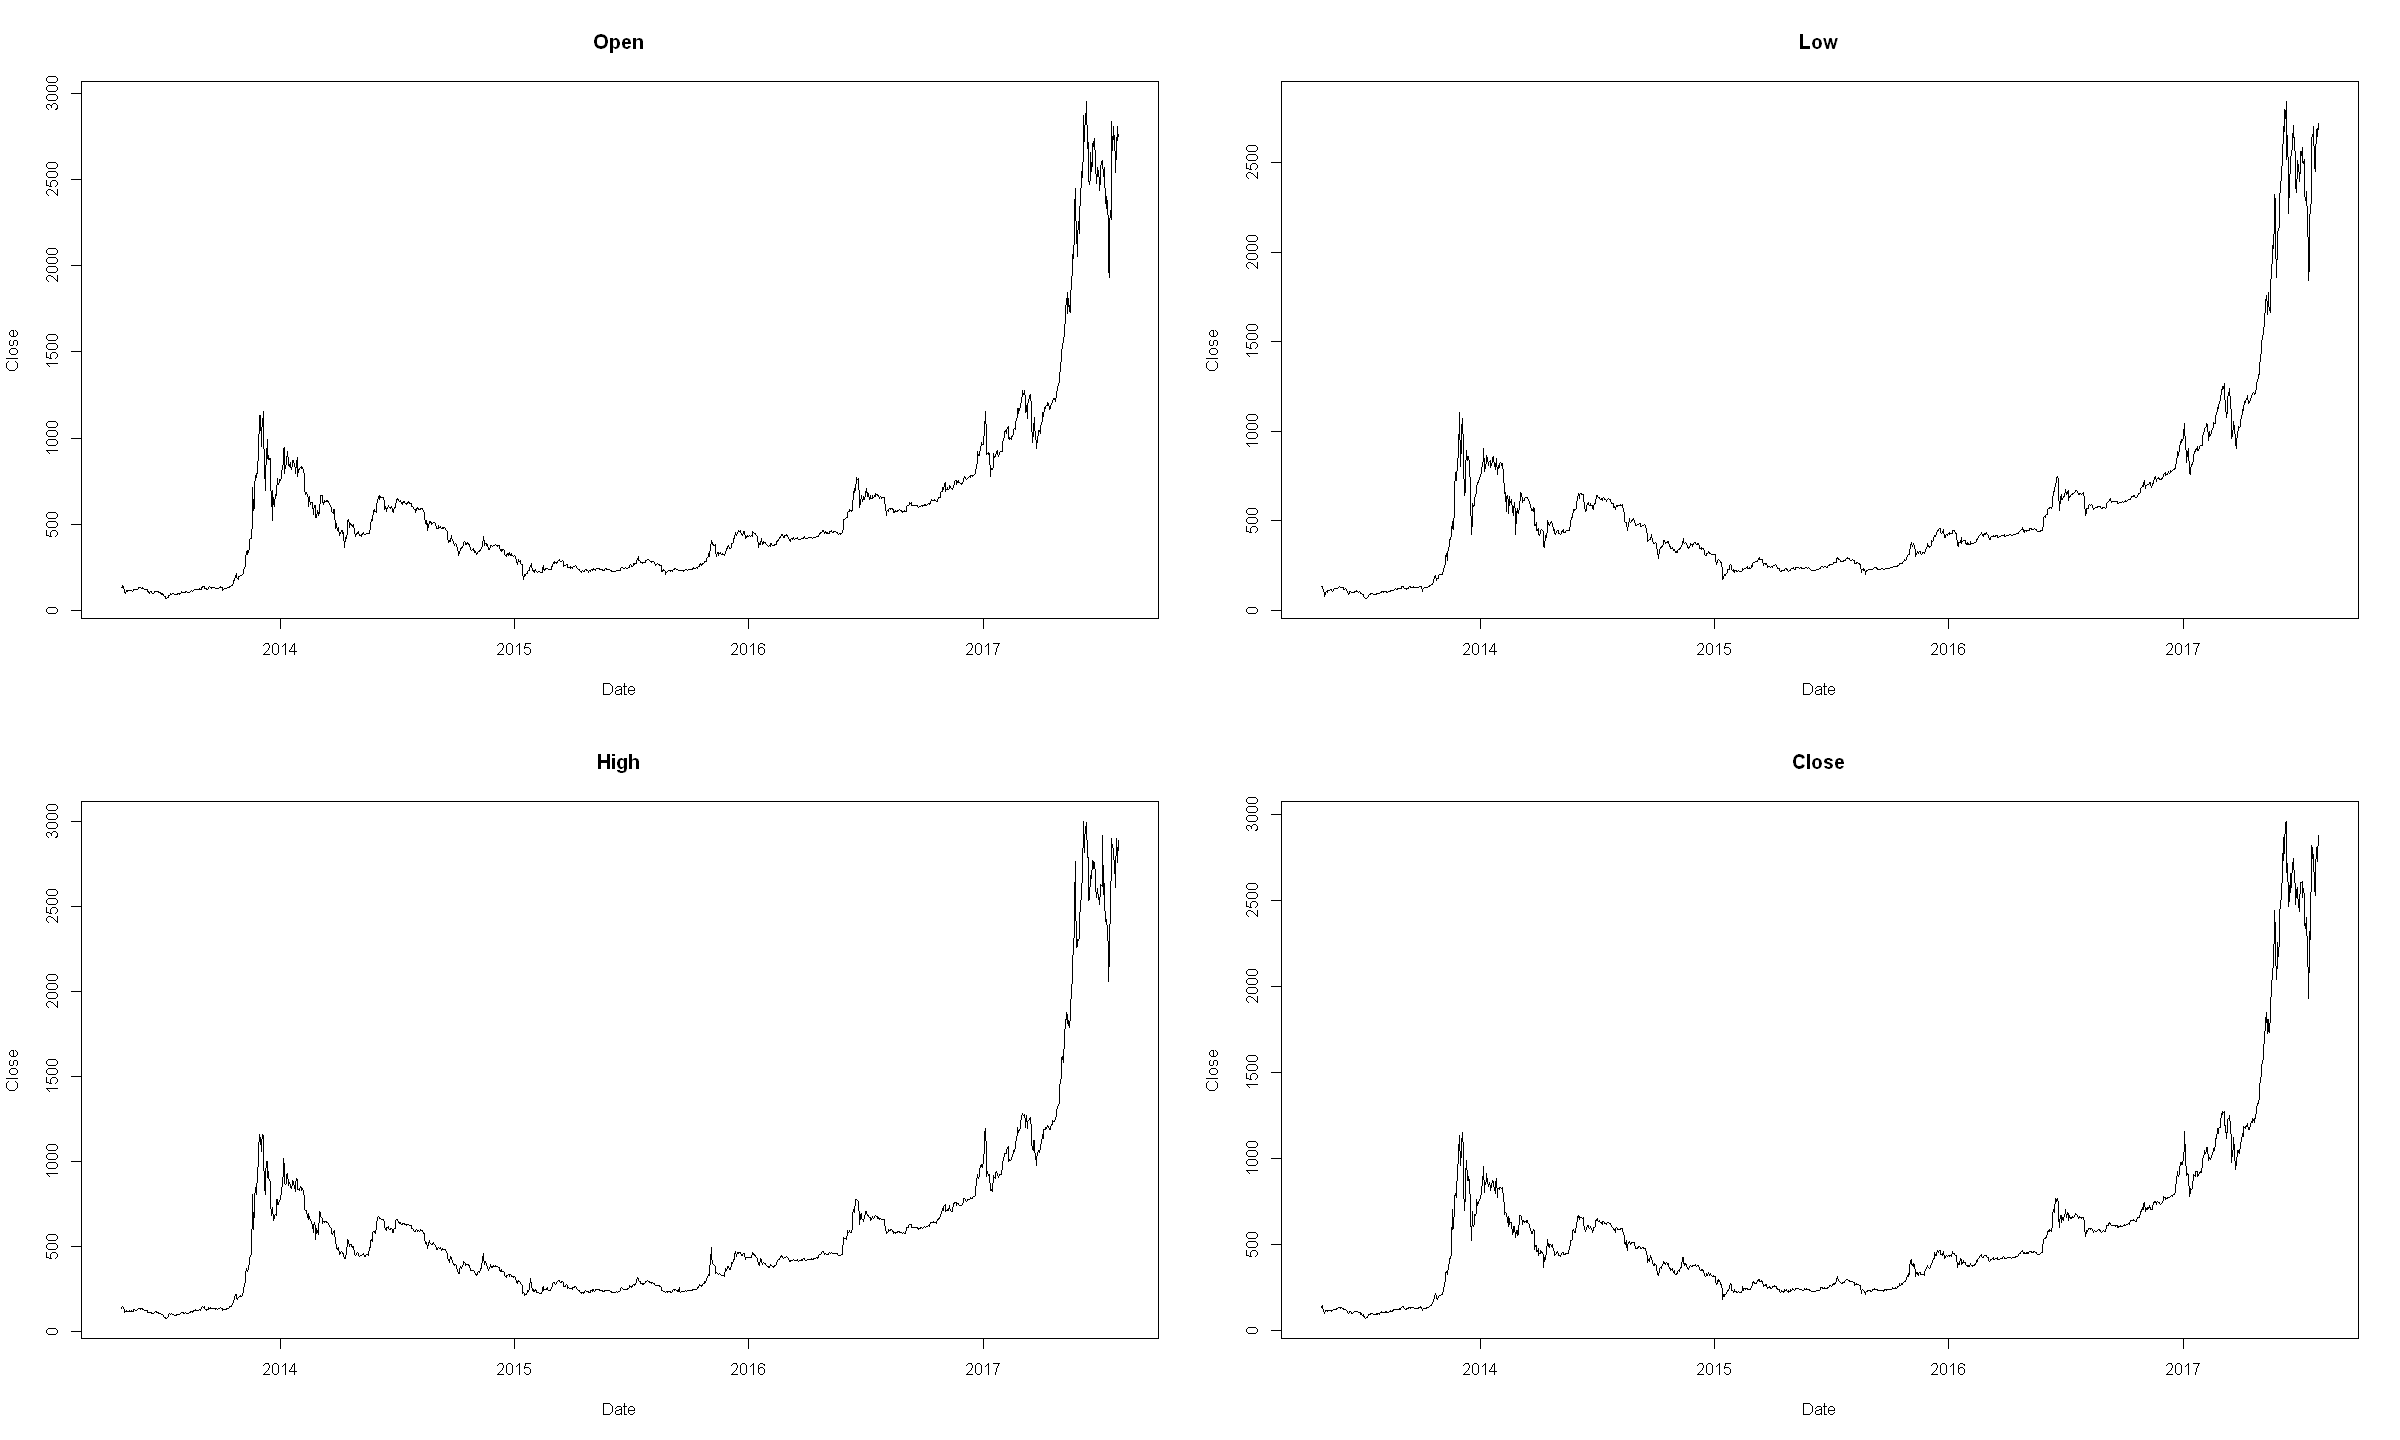

In [35]:

# Set the plot size
# Lets customize the plot size using options() , u can use the repr package !
options(repr.plot.width=20, repr.plot.height=12)

# Create a layout for subplots
layout(matrix(1:4, nrow = 2, ncol = 2))
## create layout matrix using layout() to create subplots as a 2x2 grid

# Loop through each col
for (col in c('Open', 'High', 'Low', 'Close'))
{
  
  # plot this on subplot
  plot(data$Date, data[[col]], type = "l", xlab = "Date", ylab = "Close",
       main = col)
}


### do not use data$col , else u will end up getting improper plots !

In [ ]:
"
Why data[[col]] in below code instead of data$col :
plot(data$Date, data[[col]], type = "l", xlab = "Date", ylab = "Close", main = col)




Here's a simple explanation:

data$col :  This is used when you know the exact name of the column you want, and you provide it directly. 
            It's like saying, "Give me the column named y_axis_fea from the data frame df.."

data[[col]] : This is used when the column name is stored in a variable (col in this case).. 
              or the column name is generated dynamically using some operation..
              It's like saying "Give me the column whose name is stored in the variable "col" from the data frame data"
              ie , Here "col" is a variable containing the column name, thats why we will use data[[col]]
              As we are accessing col-name via loop , hence we don't know col-name , thats why its good to use data[[col]]

Summary:

data$col: Use when you know the exact column name.
data[[col]]: Use when the column name is stored in a variable or generated dynamically.


data[col] ->> is used if u want o/p in dataframe else everything is same..
"

"

In [ ]:
"

When you execute :

par(mfrow = c(2, 2))
OR
layout(matrix(1:4, nrow = 2, ncol = 2))

par() : function in R that is used to set various graphical parameters for plotting.
mfrow : It stands for "multiple figures in a row," and it controls the arrangement of plots.


R will create a layout/subplots with 2 rows and 2 columns 
and subsequent plots that you create using functions 
like plot() or hist() will be arranged in this grid..

Each plot will take up one of the four subplots in the grid


"

# 4.. Analysing open , high , low , close value of Bitcoin !
    try out candle-stick/ohlc charts ! , both are same ..

In [36]:
dim(data)

[1] 1556    7

In [37]:
bitcoin_sample = data[1:50 , ]

### consider sample of data if u dont have good specifications pc/laptop ...

In [13]:
library(plotly)

In [14]:
args(plot_ly)

function (data = data.frame(), ..., type = NULL, name, color, 
    colors = NULL, alpha = NULL, stroke, strokes = NULL, alpha_stroke = 1, 
    size, sizes = c(10, 100), span, spans = c(1, 20), symbol, 
    symbols = NULL, linetype, linetypes = NULL, split, frame, 
    width = NULL, height = NULL, source = "A") 
NULL

In [39]:

# Assuming bitcoin_sample is your data frame

candlestick = plot_ly(
  x = bitcoin_sample$Date , ## make sure "Date" col should be in date-time format for better plot 
  type = "candlestick" ,
  open = bitcoin_sample$Open ,
  high = bitcoin_sample$High ,
  low = bitcoin_sample$Low ,
  close = bitcoin_sample$Close 
)


## plot_ly(bitcoin_sample, type = "candlestick", x = ~Date, open = ~Open, high = ~High, low = ~Low, close = ~Close)

In [ ]:
# Show the candlestick chart
candlestick

In [ ]:
?plotly :: layout

###  help(plotly :: layout) => will not work..

## This function is used to set layout properties for the plot or Modify the layout of a plotly visualization

In [ ]:
"
From official documentation : 

layout(p, ..., data = NULL)

p = plotly graph object

"

In [ ]:
"

from chatgpt : 
Here's a summary of the layout() function and some of its commonly used parameters : 

layout(
  title = NULL,
  xaxis = NULL,
  yaxis = NULL,
  annotations = NULL,
  legend = NULL,
  margin = NULL,
  hovermode = NULL,
  barmode = NULL,
  plot_bgcolor = NULL,
  paper_bgcolor = NULL,
  ...
)


"

In [10]:
args(plotly :: layout)

### as we have layout in base-R as well , 
### that's why it is good to use plotly :: layout

function (p, ..., data = NULL) 
NULL

        p : This is typically a plotly object (e.g., the result of a plot_ly() call). 
            The layout function is applied to this plotly object to customize plot 

        ... : This ellipsis (...) is telling , it can receive multiple arguments.. 
              In case of the layout function, it allows you to pass those parameters 
              which can customize title, axis labels, annotations, etc.

In [ ]:
"

fig = layout(candlestick , list(
  title = "Bitcoin Candlestick Chart",
  xaxis = list(title = "Date"),
  yaxis = list(title = "Price")
)


fig

"

### lets apply dplyr chaining to make it more interactive !
### Make sure u have imported dplyr , bcz %>% (pipe) operator is defined in this package..

In [ ]:

# Set Layout
layout = list(
  title = "Bitcoin Candlestick Chart",
  xaxis = list(title = "Date"),
  yaxis = list(title = "Price")
)


# Create Figure
fig = candlestick %>% layout(layout)

# Display the Plot
# fig

# 5.. Analysing closing price (on normal scale & log-scale)

In [43]:
head(data , 2)

,Date,Open,High,Low,Close,Volume,Market.Cap
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
2,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [1]:
help(plot)

In [ ]:
"

## Default S3 method :
plot(x, y = NULL, type = "p",  xlim = NULL, ylim = NULL,
     log = "", main = NULL, sub = NULL, xlab = NULL, ylab = NULL,
     ann = par("ann"), axes = TRUE, frame.plot = axes,
     panel.first = NULL, panel.last = NULL, asp = NA,
     xgap.axis = NA, ygap.axis = NA,
     ...)

"

In [11]:
args(plot)

function (x, y, ...) 
NULL



    x: The x-axis values.. (should be a numerical vector)
    y: The y-axis values.. (should be a numerical vector)
    ...: Additional arguments. These can include various graphical parameters, such as type, 
                               col (color), main (main title), xlab (x-axis label), ylab (y-axis label), etc.

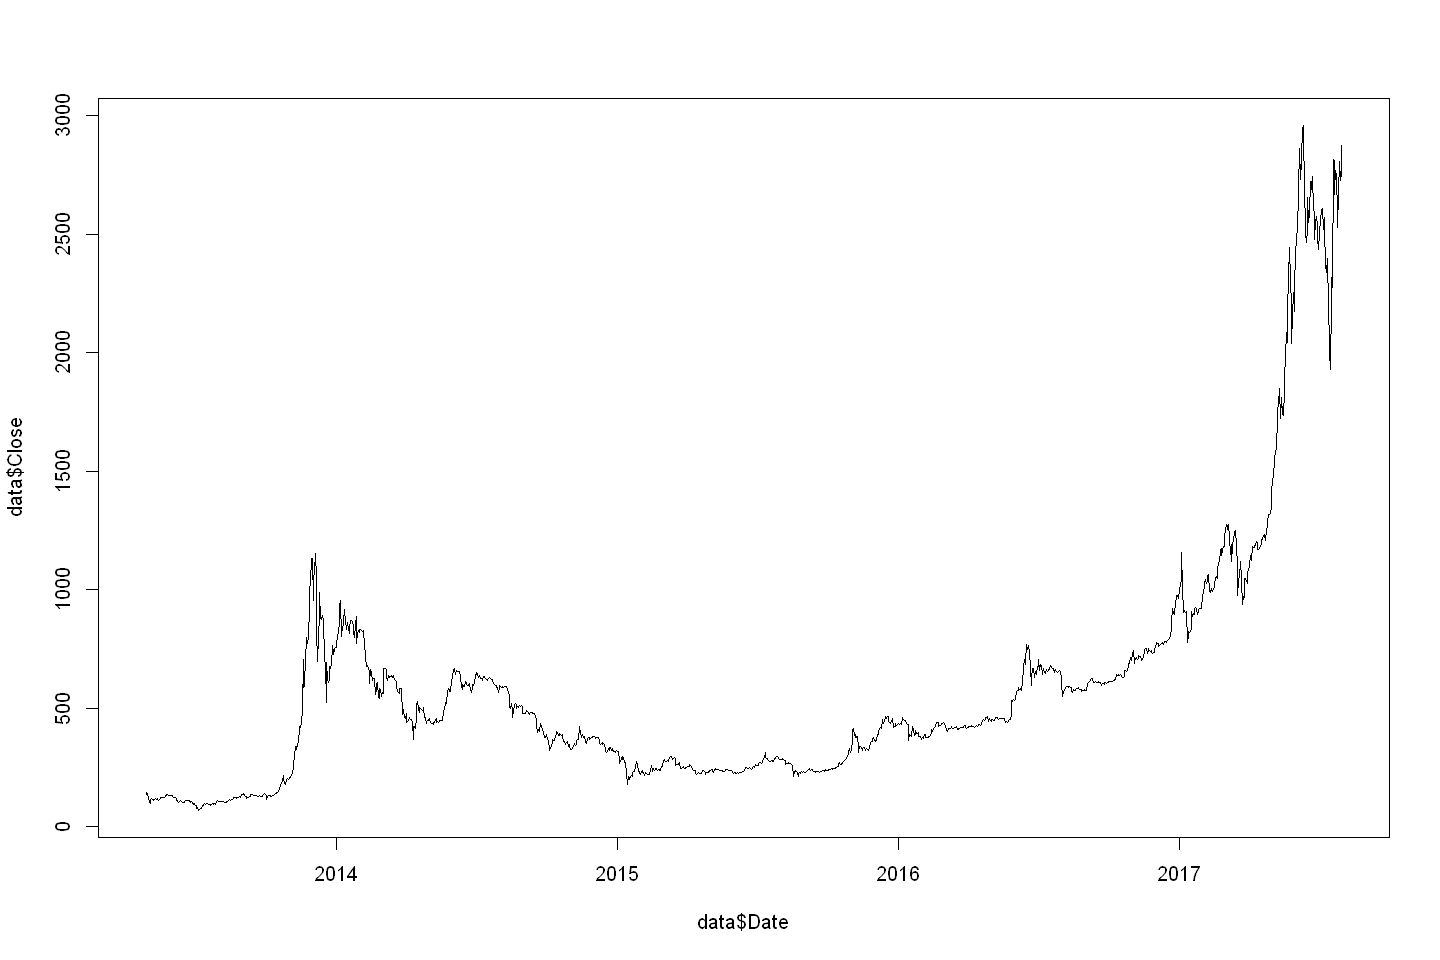

In [82]:
options(repr.plot.width=12, repr.plot.height=8) 
# Lets customize the plot size using options() , u can use the repr package !

plot(data$Date, data$Close , type="l")

In [85]:
data$Close[1:10]

[1] 134.21 144.54 139.00 116.99 105.21  97.75 112.50 115.91 112.30 111.50

In [84]:
log1p(data$Close)[1:10]

[1] 4.906829 4.980451 4.941642 4.770600 4.665418 4.592591 4.731803 4.761404
 [9] 4.730039 4.722953

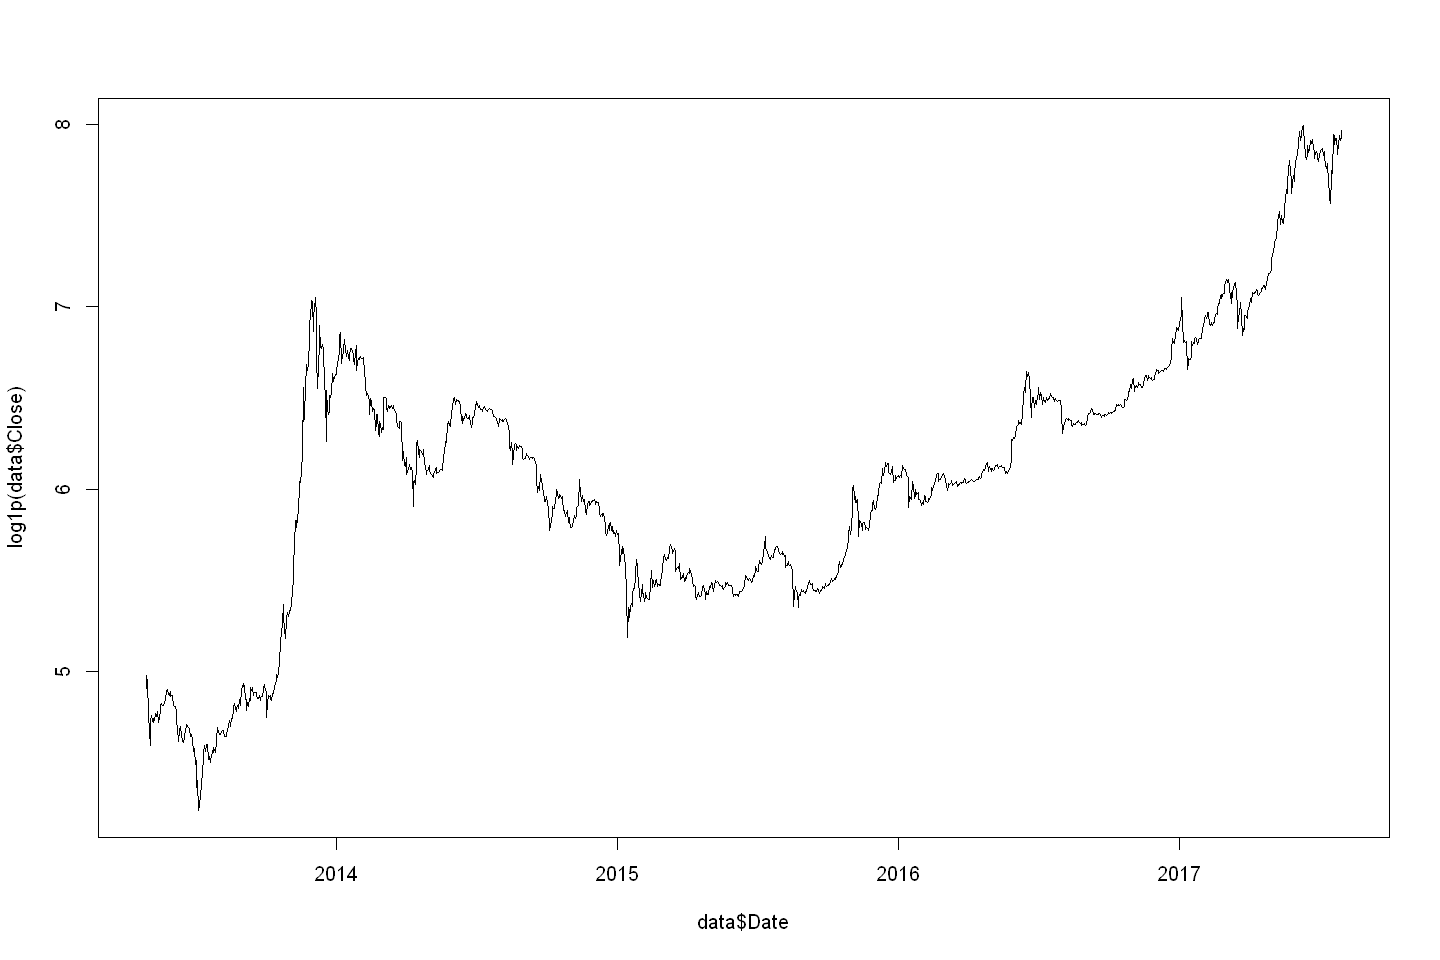

In [86]:
options(repr.plot.width=12 , repr.plot.height=8)
plot(data$Date , log1p(data$Close) , type="l")

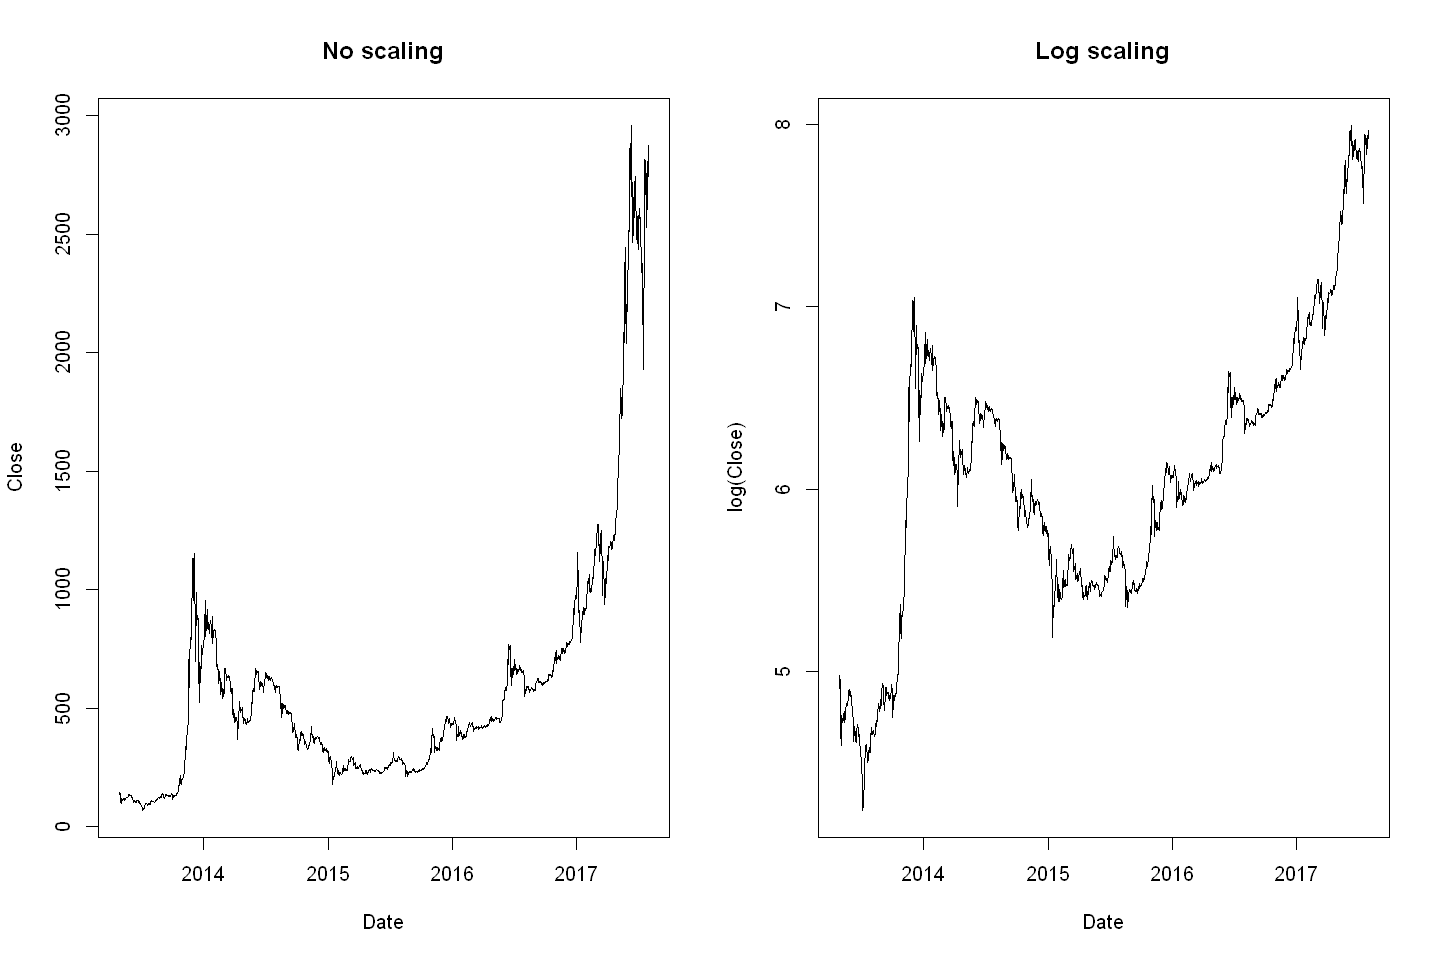

In [89]:
# Set the plot size
layout(matrix(1:2, nrow = 1, ncol = 2))
## create layout matrix using layout() to create subplots as a 1x2 grid

# Plot 1: No scaling
plot(data$Date , data$Close, type='l', main='No scaling', 
     ylab='Close', xlab='Date')

# Plot 2: Log scaling
plot(data$Date , log1p(data$Close), type='l', main='Log scaling', 
     ylab='log(Close)', xlab='Date')


In [ ]:
### Logarithmic price scales are better than linear price scales at 
### showing less severe price increases or decreases..

### log scale is always better if u have outliers or some high values in data

In [ ]:
'''


Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers


'''

# 6.. Analyse closing Price on Yearly , Quarterly , monthly basis !

In [ ]:
'''
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')
    
'''

In [90]:
head(data , 2)

### it date belongs to character 

,Date,Open,High,Low,Close,Volume,Market.Cap
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
2,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [1]:
help(format)

In [ ]:
"

x : This parameter represents the object you want to format. It could be a numeric value, a date,
    or any other data type that the format() function can handle.


... : The ellipsis (...) allows you to pass additional arguments to the format() function. 
        These arguments vary depending on the type of object you are formatting. 
        For example, if you're formatting a date, you might pass arguments to specify the format in which you want the date 
        to appear.


"

In [3]:
args(format)

function (x, ...) 
NULL

In [91]:
# Extract year and month from the 'date' column
data$year = base :: format(data$Date, "%Y")
## data$year = base :: format(x = data$Date, format = "%Y") 

data$month = base :: format(data$Date, "%m")

In [92]:
ceiling(4/3)

## ie if month is 4 , then it is 2nd quarter !

[1] 2

In [93]:
# Calculate the quarter based on the month
data$quarter = ceiling(as.numeric(data$month) / 3)

In [94]:
data$day_name = format(data$Date, "%A")

### Perform Resample analysis on Monthly basis !

In [98]:
head(data , 5)

,Date,Open,High,Low,Close,Volume,Market.Cap,year,month,quarter,weekday
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",2013,04,2,Sunday
2,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",2013,04,2,Monday
3,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",2013,04,2,Tuesday
4,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2013,05,2,Wednesday
5,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",2013,05,2,Thursday


In [6]:
library(dplyr)

In [ ]:
help(group_by)

### Group by one or more variables !

In [7]:
args(group_by)

function (.data, ..., .add = FALSE, .drop = group_by_drop_default(.data)) 
NULL

    .data: This is the data frame that you want to group. 
            It represents the dataset on which u want to apply groupby()

    ...: The ellipsis (...) is a placeholder for additional arguments. 
        In the case of group_by(), it allows you to specify the grouping columns. 
        You can provide column names, expressions, or functions that generate the grouping variables.


In [ ]:
help(summarise)

In [ ]:
"

summarise() creates a new data frame..
It returns one value/row for each combination of grouping variables ;
                    OR
It returns one value for every sub-category in grouping variables ;
eg avg price of category col
                    OR
for every year & month , it returns 1 value (avg_close)


if there are no grouping variables, the output will have a single value 
which is summarising rows of a column..

"

In [8]:
args(summarise)

function (.data, ..., .by = NULL, .groups = NULL) 
NULL

    .data : data frame or tibble you want to summarize..

    ... : The ellipsis (...) means I can pass additional arguments, 
          which are typically expressions that define the new columns or summary statistics you want to calculate..

In [ ]:
gdf = group_by(data , year , month )
summarise(gdf , avg_closing = mean(Close))

## summarise(group_by(data , year , month ) , avg_closing = mean(Close))

In [ ]:
### lets write similar code using dplyr chaining , 
### as chaining makes code more readable !

### before executing below code , make sure u have 
### installed & imported dplyr as pipe operator is defined in dplyr package

In [102]:
monthly_mean = data %>% group_by(year , month) %>% 
                summarise(avg_closing = mean(Close)) 

yearly_mean = data %>% group_by(year) %>% 
                summarise(avg_closing = mean(Close)) 

quarter_mean = data %>% group_by(year , quarter) %>% 
                summarise(avg_closing = mean(Close)) 





## if getting Warning : `summarise()` has grouped output by 'year'. You can override using the `.groups` argument..
## such warnings occur in group_by , when we group our data using 2 or more features.. 
## .groups = "drop" in summarise() says that you want to drop the grouping after summarization
## which results in suppressing the warning message..
## ie .groups = 'drop' remove the grouping imposed by group_by() and return an ungrouped data frame.

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


In [103]:
head(quarter_mean , 3)

year,quarter,avg_closing
<chr>,<dbl>,<dbl>
2013,2,115.1622
2013,3,111.2912
2013,4,502.6576


In [ ]:
### now I have to plot x vs y 
## on x-axis , I must have Date as : [2013-03-01,  2013-06-01 , 2013-09-01 , 2014-01-01 , 2014-04-01]
## on y-axis , I must have avg_closing values as : [63.90 , 61.53 , 66.32]

## Note : If u will directly plot year vs avg_closing , u will get irelevant plot

In [ ]:
help(paste)

## Concatenate Strings

In [9]:
args(paste)

function (..., sep = " ", collapse = NULL, recycle0 = FALSE) 
NULL

In [ ]:
"

... : These are the objects to be concatenated together. 
        You can provide multiple objects separated by commas (x, y, z, etc.).

sep : This is the separator to use between the objects. 
        By default, it is set to a single space " "


"

In [101]:
as.Date(paste(2013, 02*3, "04", sep = "-"))
## ie date should be : 2013-06-04

## year is 2013 , quarter is 2 ie lets consider month is 6 , day is 4

[1] "2013-06-04"

In [104]:
quarter_mean$Date = as.Date(paste(quarter_mean$year, 
                                  quarter_mean$quarter*3, "01", sep = "-"))

In [109]:
head(quarter_mean , 3)

year,quarter,avg_closing,Date
<chr>,<dbl>,<dbl>,<date>
2013,2,115.1622,2013-06-01
2013,3,111.2912,2013-09-01
2013,4,502.6576,2013-12-01


In [10]:
args(plot)

function (x, y, ...) 
NULL

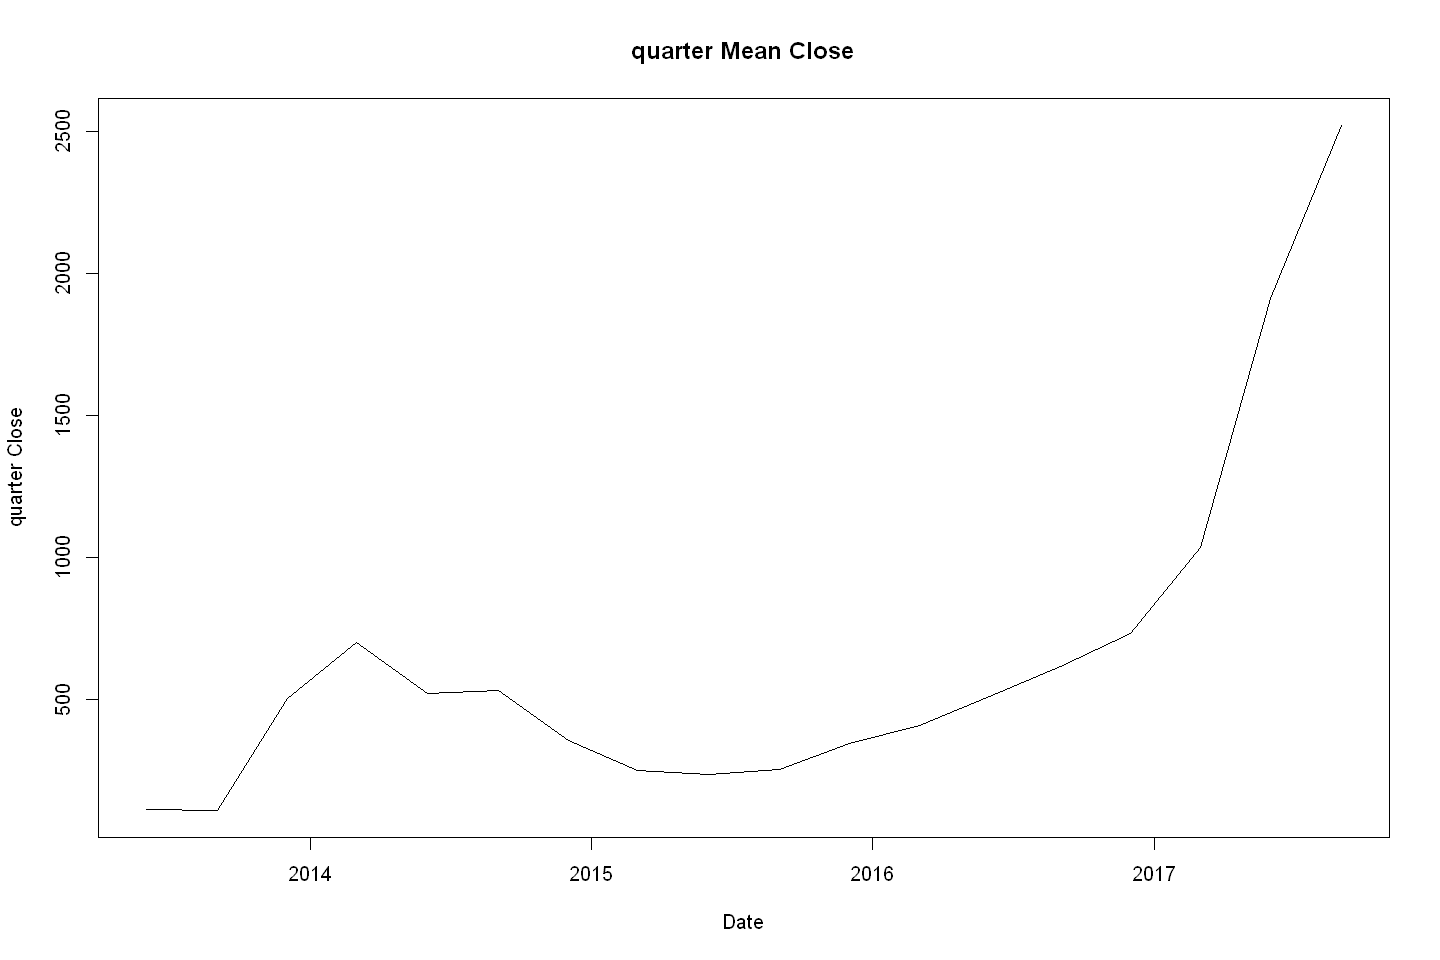

In [105]:
# Create a line plot
plot(quarter_mean$Date ,  quarter_mean$avg_closing, type = "l", 
     xlab = "Date", ylab = "quarter Close",
     main = "quarter Mean Close")

In [106]:
head(monthly_mean , 2)

year,month,avg_closing
<chr>,<chr>,<dbl>
2013,04,139.2500
2013,05,119.9932


In [107]:
monthly_mean$Date = as.Date(paste(monthly_mean$year, monthly_mean$month, "01", sep = "-"))

In [108]:
head(monthly_mean , 2)

year,month,avg_closing,Date
<chr>,<chr>,<dbl>,<date>
2013,04,139.2500,2013-04-01
2013,05,119.9932,2013-05-01


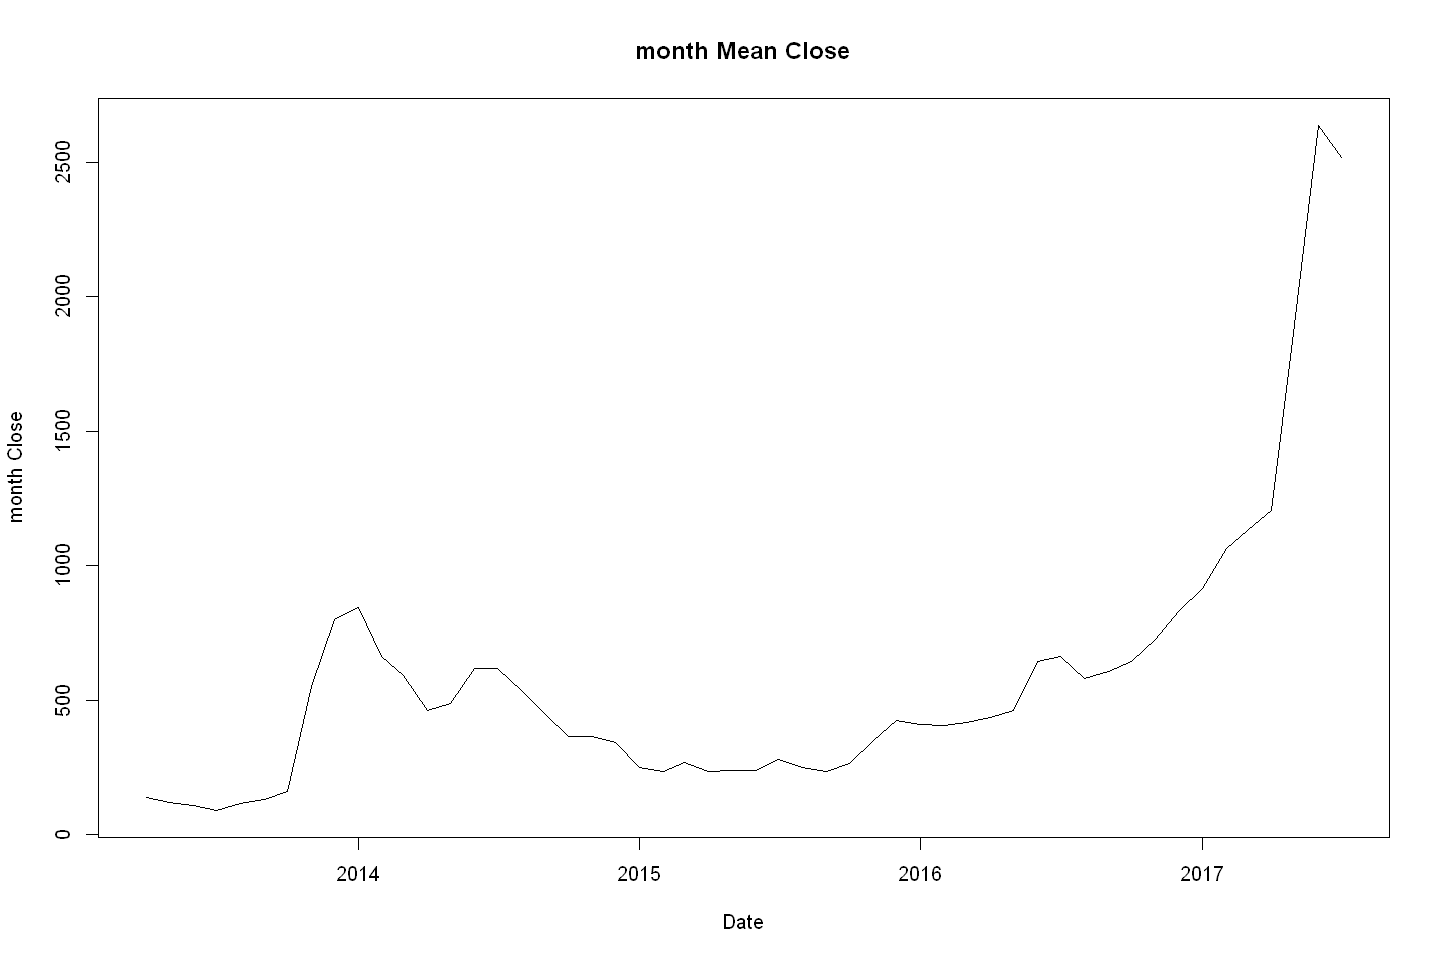

In [111]:
# Create a line plot
plot(monthly_mean$Date , monthly_mean$avg_closing, type = "l", 
     xlab = "Date", ylab = "month Close",
     main = "month Mean Close")


### plotly :: plot_ly(x = monthly_mean$Date , y = monthly_mean$avg_closing, type = "scatter", mode = "lines")

# 7..  analysing Daily change in Closing price of stocks

##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then,
    multiply the result by the number of shares you own in the company. 

In [113]:
head(data , 3)

,Date,Open,High,Low,Close,Volume,Market.Cap,year,month,quarter,weekday
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",2013,04,2,Sunday
2,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",2013,04,2,Monday
3,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",2013,04,2,Tuesday


In [ ]:
### compute % changes for "Close" col...

In [114]:
data$Close[1:5]


### for 2nd index % change , it should be : 
## [(current_value - previous_value) / previous_value] * 100
## [(144.54 - 134.21) / 134.21] * 100 = +7.7 % change

[1] 134.21 144.54 139.00 116.99 105.21

In [13]:
help(lag)

## Find the "previous" (lag()) or "next" (lead()) values in a vector.

In [ ]:
"

lag(x, n = 1L, default = NULL, order_by = NULL, ...)

"


"

x : This is the vector or data frame column on which u want to perform shift operation..


k : This argument specifies the number of positions by which shifting occurs.. 
    If k is +ve, the vector or column is shifted forwards ; 
    if k is -ve, the vector or column is shifted backwards.. 
    The default value is 1, meaning the vector or column is shifted one position.


order.by : This argument is only applicable when x is a time series object. 
            It allows you to specify an optional time index for the time series..

"

In [12]:
args(lag)

## x : i/p data 

function (x, ...) 
NULL

In [115]:
lag(data$Close[1:5])

[1]     NA 134.21 144.54 139.00 116.99

In [116]:
((data$Close - lag(data$Close))/lag(data$Close) * 100)[1:5]

[1]         NA   7.696893  -3.832849 -15.834532 -10.069237

In [117]:
data$Close_price_pct_change = ((data$Close - lag(data$Close))/lag(data$Close) * 100)

In [120]:
head(data , 4)

,Date,Open,High,Low,Close,Volume,Market.Cap,year,month,quarter,weekday,Close_price_pct_change
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",2013,04,2,Sunday,NA
2,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",2013,04,2,Monday,7.696893
3,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",2013,04,2,Tuesday,-3.832849
4,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2013,05,2,Wednesday,-15.834532


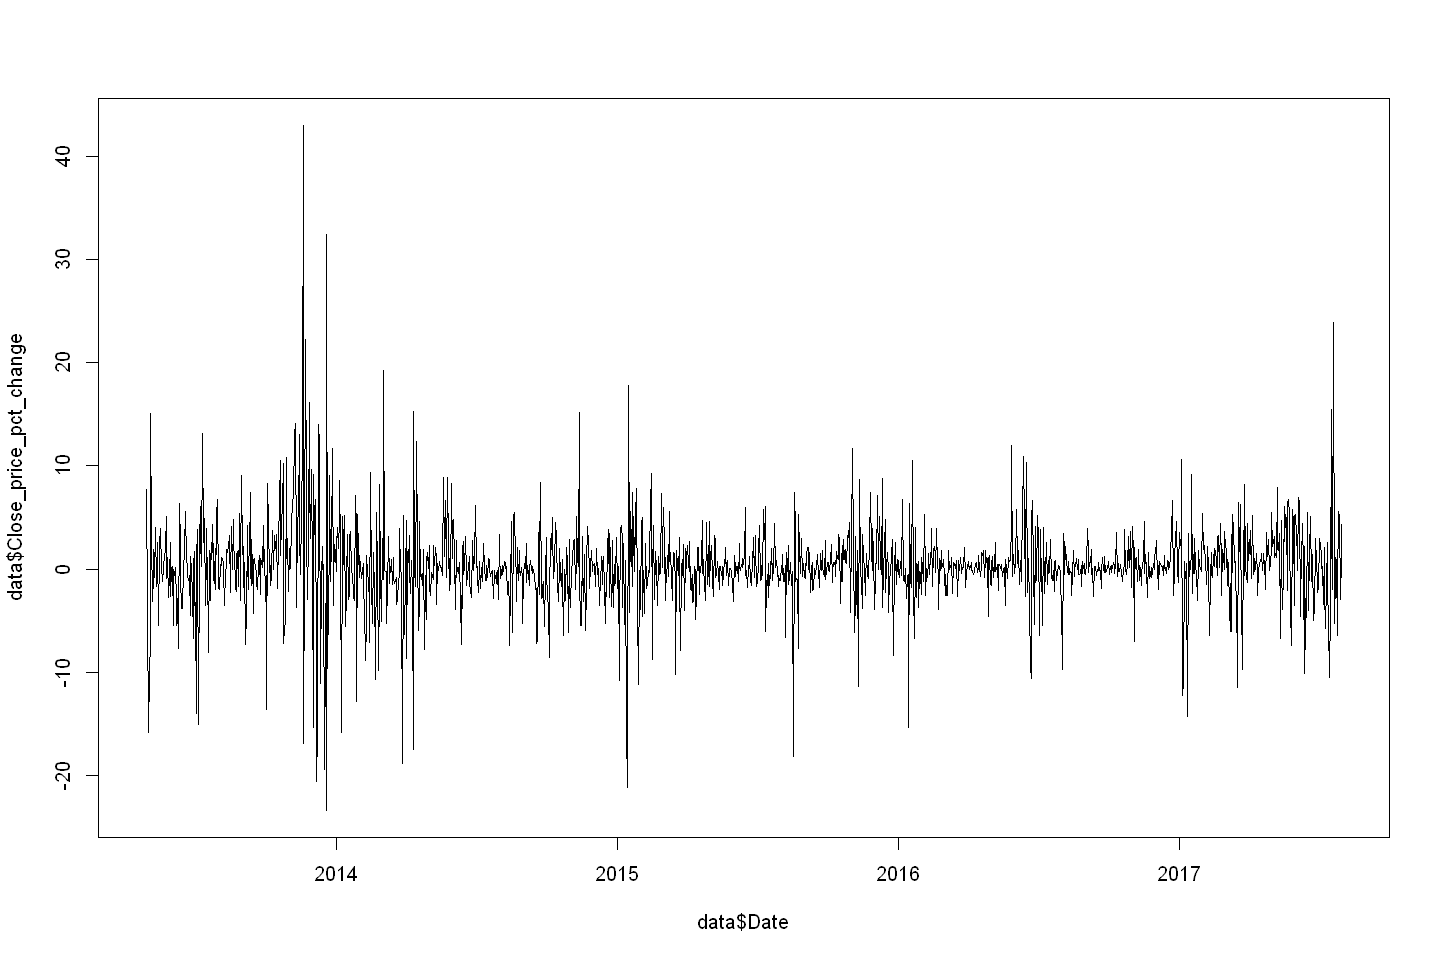

In [121]:
plot(data$Date , data$Close_price_pct_change , type="l")

In [ ]:
'''

If u want to make this base-R plot interactive , u can think of using Plotly 


'''

In [16]:
library(plotly)

In [17]:
args(plot_ly)

function (data = data.frame(), ..., type = NULL, name, color, 
    colors = NULL, alpha = NULL, stroke, strokes = NULL, alpha_stroke = 1, 
    size, sizes = c(10, 100), span, spans = c(1, 20), symbol, 
    symbols = NULL, linetype, linetypes = NULL, split, frame, 
    width = NULL, height = NULL, source = "A") 
NULL

In [ ]:
### plotly :: plot_ly(x = data$Date , y = data$Close_price_pct_change , type = "scatter" , mode = "lines")